In [7]:
from fenics import *
import time
import matplotlib.pyplot as plt
%matplotlib inline
from dolfin import *
import numpy as np
from mshr import Rectangle, Circle, generate_mesh

ImportError: generic_type: type "CSGGeometry" referenced unknown base type "dolfin::Variable"

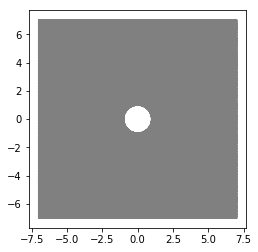

In [50]:
T = 1.0 # final time

# Create mesh and define function space
lx = ly = 7.0
R = 1.0

# Define 2D geometry
rectangle = Rectangle(Point(-lx,-ly), Point(lx, ly))
well = Circle(Point(0, 0), R)
dom = rectangle - well

# Generate and plot mesh
mesh = generate_mesh(dom, 150)
plot(mesh, "2D mesh")

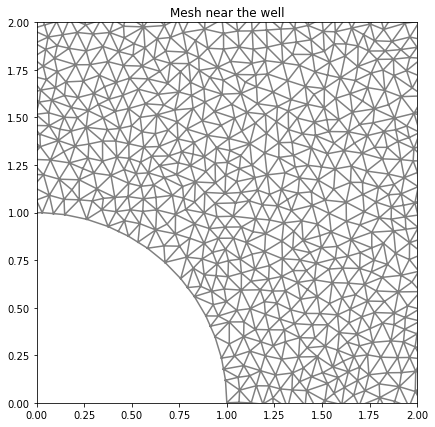

In [52]:
plt.figure(figsize = [7,7])
plt.xlim([0,2])
plt.ylim([0,2])
plt.title('Mesh near the well')
plt.savefig('Mesh_well.eps', format='eps', dpi=1000)
plot(mesh, "2D mesh")

In [47]:
hmin = mesh.hmin()
print('hmin: 'hmin)
hmax = mesh.hmax()
print('hmax: 'hmax)

CFL_bound = hmin**2
print('CFL bound: ', CFL_bound)

0.05976529255655976
0.11879159659726846
CFL bound  0.0035718901943711774


In [48]:
dt = 0.0005
num_steps = np.floor(T/dt)
print('Num_steps: ', num_steps)

Num_steps:  2000.0


In [5]:
V = FunctionSpace(mesh, 'P', 1)

In [6]:
# Define boundaries
wallsy    = 'near(x[1], -5.0) || near(x[1], 5.0)'
wallsx    = 'near(x[0], -5.0) || near(x[0], 5.0)'
cylinder = 'on_boundary && x[0]<2.0 && x[0]>-2.0 && x[1]>-2.0 && x[1]<2.0'


# Define boundary conditions
bcu_wallsy = DirichletBC(V, Constant(0.), wallsy)
bcu_wallsx = DirichletBC(V, Constant(0.), wallsx)

bcu_cylinder = DirichletBC(V, Constant(1.), cylinder)
bcu = [bcu_wallsx, bcu_wallsy, bcu_cylinder]

In [7]:
vel = Expression(('5. + x[0]/2/DOLFIN_PI/(pow(x[0],2) + pow(x[1],2))',
                  '0. + x[1]/2/DOLFIN_PI/(pow(x[0],2) + pow(x[1],2))'  ), domain=mesh, degree=2)


In [8]:
dx = Measure('dx', domain = mesh)

In [9]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)

# Define initial value
u_0 = Expression('0', domain=mesh, degree=2)
u_n = interpolate(u_0, V)

sigma = 1

a = u * v * dx
L =  u_n * v * dx + dt * dot(vel, grad(u_n)) * v * dx - dt/2 * sigma ** 2 * dot(grad(u_n),grad(v)) * dx



0.0


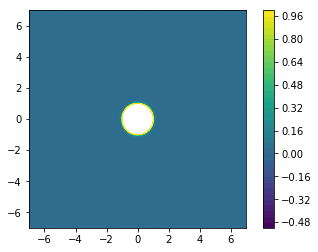

0.1


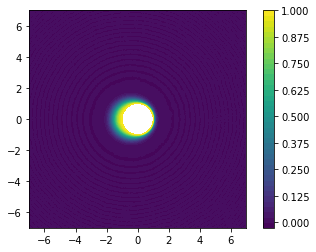

0.2


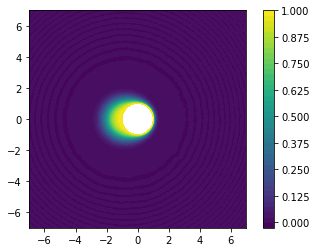

0.3


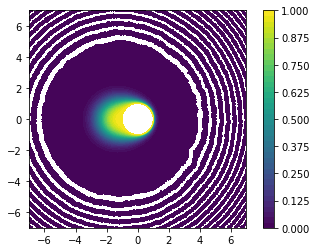

0.4


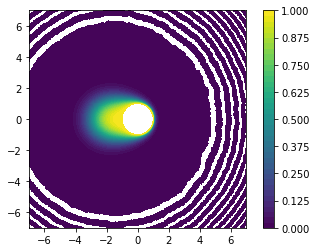

0.5


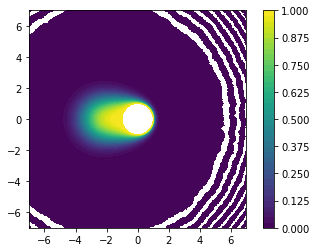

0.6


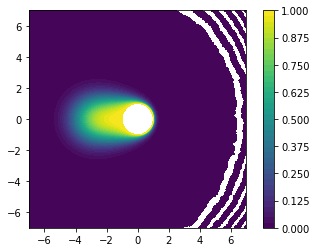

0.7000000000000001


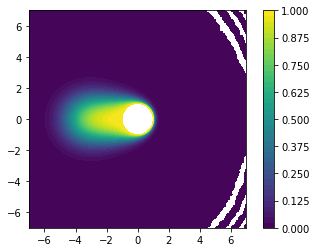

0.8


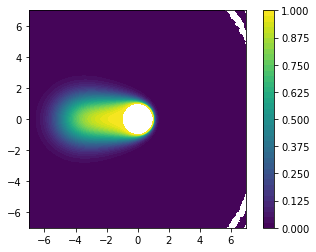

0.9


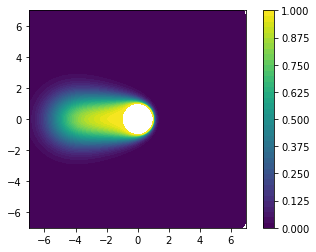

In [10]:
# Time-stepping
u = Function(V)

t = 0
for n in range(int(num_steps)):

    # Update current time
    t += dt

    # Compute and update the solution
    solve(a == L, u, bcu)
    u_n.assign(u)

    # Plot solution
    if n%200 == 0:
        print(n*dt)
        p=plot(u)
        plt.colorbar(p)
        plt.show()

# Take the final step, visualize the result and compute the probabilities

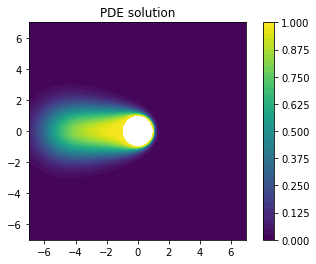

In [22]:
# Show the solution at the time of interest
p=plot(u)
plt.colorbar(p)
plt.title('PDE solution')
plt.savefig('PDE_sol.eps', format='eps', dpi=1000)
plt.show()

# X = -1.5

In [29]:
X0 = [-1.5, 1]
u(X0)

0.7173050315908374

In [30]:
X0 = [-1.5, 1.5]
u(X0)

0.3426573020536272

In [31]:
X0 = [-1.5, 2.]
u(X0)

0.10081408181152719

In [41]:
X0 = [-1.5, 3]
u(X0)

0.003090773943173127

# X = -3

In [32]:
X0 = [-3, 0]
u(X0)

0.9154860060658957

In [33]:
X0 = [-3, 1]
u(X0)

0.6476638789333776

In [34]:
X0 = [-3, 2]
u(X0)

0.173907550695596

In [35]:
X0 = [-3, 3]
u(X0)

0.015134991497104936

# X = 0

In [36]:
X0 = [0, 1.5]
u(X0)

0.12449653739620578

In [37]:
X0 = [0, 2]
u(X0)

0.0109458174658611

In [38]:
X0 = [0, 2.5]
u(X0)

0.000851609120970076

In [39]:
X0 = [0, 3]
u(X0)

6.293701166092087e-05